# Module 3 
Replication of the eviews code for python

### Seassion 3 Questions

In [3]:
import pandas as pd
import numpy as np
#import data
df = pd.read_csv("Module3_data/module3_data_Identifying_ARMA.csv")
df.head()

,et
0,-1.213866
1,-0.285460
2,0.590270
3,0.828546
4,-0.995426


#### Question 3.8

The variable et represents a random shock variable. Provide the average and standard-deviation of et below ?

In [4]:
# Descriptive statistics
df.describe()

,et
count,500.000000
mean,-0.028460
std,0.982000
min,-3.106688
25%,-0.722506
50%,-0.025935
75%,0.620061
max,2.988090


**MEAN** -0.028
**Standard deviation**  0.982

**Question 3.9**

yt = 3.0 + 0.55yt-1 + et

Enter the value of the 5th observation of variable yar

In [5]:
yar = []
et = np.array(df['et'])
yar.append(0) #append the first observation

In [6]:
for i in range(1,len(et)):
    yar.append(3 + 0.55*yar[i-1] + et[i])
#print the 5th observation
print("Answer",round(yar[4],3))

Answer 5.648


In [7]:
len(yar)

500

**Question 3.10**

Enter the value of the 5th observation of variable yma

In [8]:
yma = []
yma.append(0)

for i in range(1,len(et)):
    yma.append(-2.5 + et[i] + 0.7 * et[i-1])
    
print("Answer",round(yma[4],3))

Answer -2.915


**Question 3.12**

Enter the value of the 5th observation of yarma
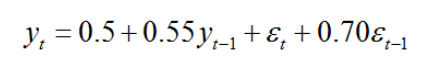

In [9]:
yarma = []
yarma.append(0)

for t in range(1,len(et)):
    yarma.append(0.5 + 0.55 * yarma[t-1] + et[t] + 0.7 * et[t-1])

print("Answer",round(yarma[4],3))

Answer 1.206


**Question 3.13**

compute the ACF at lags 1-20 for the four series: et and Variables yar,yma and yarma.
Enter the values (using 3 decimal places, without rounding) of the ACF at one lag for each series below

In [10]:
import statsmodels.api as sm
acf_et = sm.tsa.stattools.acf(et, nlags = 20, adjusted = True)
acf_yar = sm.tsa.stattools.acf(yar, nlags = 20, adjusted = True)
acf_yma = sm.tsa.stattools.acf(yma, nlags = 20, adjusted = True)
acf_yarma = sm.tsa.stattools.acf(yarma, nlags = 20, adjusted = True)

C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [11]:
# values at one lag
print("et", round(acf_et[1],3))
print("ar", round(acf_yar[1],3))
print("ma", round(acf_yma[1],3))      
print("arma", round(acf_yarma[1],3))

et 0.024
ar 0.522
ma 0.427
arma 0.728


**Question 3.14**

In [12]:
0.55**2

0.30250000000000005

**Question 3.15**

In [13]:
# values at one lag
print("et", round(acf_et[2],3))
print("ar", round(acf_yar[2],3))
print("ma", round(acf_yma[2],3))      
print("arma", round(acf_yarma[2],3))

et -0.099
ar 0.207
ma -0.102
arma 0.332


**Question 3.17**

 estimate the PAC for variable yar for lag 1, then for lag 2

In [14]:
# from sklearn.linear_model import LinearRegression
# ols =  LinearRegression()
y_ar_lag = [np.nan]
for t in range(1, len(yar)):
    y_ar_lag.append(yar[t-1])

In [15]:
df['yar_lag'] = np.array(y_ar_lag)
df['yar'] = np.array(yar)

In [16]:
df = sm.tools.add_constant(df)
df.head()

C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,et,yar_lag,yar
0,1.0,-1.213866,NaN,0.000000
1,1.0,-0.285460,0.000000,2.714540
2,1.0,0.590270,2.714540,5.083267
3,1.0,0.828546,5.083267,6.624343
4,1.0,-0.995426,6.624343,5.647963


In [17]:
X = df[['yar_lag', 'const']]
model = sm.OLS(df['yar'], X , missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    yar   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           4.62e-39
Time:                        15:54:10   Log-Likelihood:                -698.03
No. Observations:                 499   AIC:                             1400.
Df Residuals:                     497   BIC:                             1408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yar_lag        0.5252      0.037     14.292      0.0

In [18]:
# create two lags y
y_ar_lag2 = [np.nan]
for t in range(1, len(y_ar_lag)):
    y_ar_lag2.append(y_ar_lag[t-1])

In [19]:
df['yar_lag2'] = np.array(y_ar_lag2)
df.head()

,const,et,yar_lag,yar,yar_lag2
0,1.0,-1.213866,NaN,0.000000,NaN
1,1.0,-0.285460,0.000000,2.714540,NaN
2,1.0,0.590270,2.714540,5.083267,0.000000
3,1.0,0.828546,5.083267,6.624343,2.714540
4,1.0,-0.995426,6.624343,5.647963,5.083267


In [20]:
X = df[['yar_lag','yar_lag2','const']]
model = sm.OLS(df['yar'], X , missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    yar   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     96.93
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           3.00e-36
Time:                        15:54:10   Log-Likelihood:                -694.97
No. Observations:                 498   AIC:                             1396.
Df Residuals:                     495   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yar_lag        0.5699      0.045     12.709      0.0

# Estimation with stationary time series

**Question 3.20**

In [21]:
#import data
df = pd.read_csv("Module3_data/module3_data_PE_Ratios.csv")
df.head()

,dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
0,1954-02-01,1954-02-28 23:59:59.999,1954-02-26,NaN,NaN,NaN,NaN,9.92
1,1954-03-01,1954-03-31 23:59:59.999,1954-03-31,NaN,NaN,NaN,NaN,10.17
2,1954-04-01,1954-04-30 23:59:59.999,1954-04-30,NaN,NaN,NaN,NaN,10.57
3,1954-05-01,1954-05-31 23:59:59.999,1954-05-31,NaN,NaN,NaN,NaN,11.00
4,1954-06-01,1954-06-30 23:59:59.999,1954-06-30,NaN,NaN,NaN,NaN,11.08


In [22]:
# set time series for pe_ind
from datetime import datetime
import dateutil.parser
data = df.pe_ind
data.index = pd.date_range("1954-02-01", periods = len(df['pe_ind']), freq = "M")
data = data[data.index > dateutil.parser.parse("2000-01-01")]
data.head()

2000-01-31    16.4949
2000-02-29    17.2608
2000-03-31    14.4154
2000-04-30    13.4247
2000-05-31    12.7792
Freq: M, Name: pe_ind, dtype: float64

In [23]:
mod_1 = sm.tsa.arima.ARIMA(data,trend='c', order = (1,0,0))
res_1 = mod_1.fit()
print(res_1.summary())

                               SARIMAX Results                                
Dep. Variable:                 pe_ind   No. Observations:                  182
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -311.138
Date:                Wed, 29 Sep 2021   AIC                            628.276
Time:                        15:54:10   BIC                            637.888
Sample:                    01-31-2000   HQIC                           632.173
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3199      1.106     15.665      0.000      15.153      19.487
ar.L1          0.9080      0.030     30.673      0.000       0.850       0.966
sigma2         1.7712      0.129     13.749      0.0

In [24]:
# load arima from stastmodel api
mod_2 = sm.tsa.arima.ARIMA(data,trend='c', order = ((1,0,0,0,0,0,0,1),0,0))
res_2 = mod_2.fit()
print(res_2.summary())

                                SARIMAX Results                                
Dep. Variable:                  pe_ind   No. Observations:                  182
Model:             ARIMA([1, 8], 0, 0)   Log Likelihood                -308.571
Date:                 Wed, 29 Sep 2021   AIC                            625.142
Time:                         15:54:10   BIC                            637.958
Sample:                     01-31-2000   HQIC                           630.337
                          - 02-28-2015                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2529      0.734     23.489      0.000      15.813      18.693
ar.L1          0.9342      0.029     31.776      0.000       0.877       0.992
ar.L8         -0.0743      0.032     -2.350 

In [25]:
# load arima from stastmodel api
mod_3 = sm.tsa.arima.ARIMA(data,trend='c', order = ((1,0,0,0,0,0,0,1),0,(0,0,0,0,0,0,0,1)))
res_3 = mod_3.fit()
print(res_3.summary())

                                 SARIMAX Results                                 
Dep. Variable:                    pe_ind   No. Observations:                  182
Model:             ARIMA([1, 8], 0, [8])   Log Likelihood                -304.248
Date:                   Wed, 29 Sep 2021   AIC                            618.495
Time:                           15:54:10   BIC                            634.515
Sample:                       01-31-2000   HQIC                           624.990
                            - 02-28-2015                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2920      0.818     21.145      0.000      15.689      18.895
ar.L1          0.9505      0.029     32.638      0.000       0.893       1.008
ar.L8         -0.0426      0

In [26]:
print("Model1 {:-2} \nModel_2 {:-2} \nModel_3 {:-2} ".format(res_1.sse, res_2.sse,res_3.sse)
     )

Model1 322.9221496616376 
Model_2 314.26626002561534 
Model_3 301.6426079129025 


In [27]:
print("Model1 {:-2} \nModel_2 {:-2} \nModel_3 {:-2} ".format(res_1.aic, res_2.aic,res_3.aic))


Model1 628.276150924617 
Model_2 625.1420066708888 
Model_3 618.4952579765882 


In [28]:
print("Model1 {:-2} \nModel_2 {:-2} \nModel_3 {:-2} ".format(res_1.bic, res_2.bic,res_3.bic)
     )

Model1 637.8881709858474 
Model_2 637.958033419196 
Model_3 634.5152914119722 


**Question 3.23**

Correlogram 

(will have to check this question f

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot residual errors
sm.stats.acorr_ljungbox(res_1.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,1.979521,0.159441
2,1.996892,0.368452
3,2.005436,0.571279
4,2.026257,0.730929
5,2.462805,0.782086
6,4.831394,0.565613
7,5.174110,0.638725
8,14.344970,0.073205
9,14.808150,0.096342
10,15.132444,0.127307


At lags 8 and 9 we reject the null hypothesis that the residual are not serial correlated.

In [30]:
# residuals = pd.DataFrame(res_1.resid)
sm.stats.acorr_ljungbox(res_2.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,0.830551,0.362113
2,0.959170,0.619040
3,1.065219,0.785476
4,1.111753,0.892403
5,1.212279,0.943694
6,2.826436,0.830294
7,3.410117,0.844652
8,8.927259,0.348469
9,11.537535,0.240653
10,11.603349,0.312479


In [31]:
# residuals = pd.DataFrame(res_1.resid)
sm.stats.acorr_ljungbox(res_3.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,0.769153,0.380479
2,0.878360,0.644565
3,1.273323,0.735477
4,1.436934,0.837751
5,1.441140,0.919761
6,2.024216,0.917458
7,2.439458,0.931586
8,2.512651,0.961138
9,4.170671,0.899824
10,4.196138,0.938065


Answer : Model 2 and Model 3

# Session 5

In [32]:
# load data
Simulated_ARMA = pd.read_csv("Module3_data\module3_data_Simulated_ARMA.csv")
Simulated_ARMA

,dateid01,dateid,y,z
0,1900-01-01,1900-01-31 23:59:59.999,0.000000,0.000000
1,1900-02-01,1900-02-28 23:59:59.999,0.000000,-0.698508
2,1900-03-01,1900-03-31 23:59:59.999,-0.142965,0.290892
3,1900-04-01,1900-04-30 23:59:59.999,0.627469,0.418416
4,1900-05-01,1900-05-31 23:59:59.999,0.407678,2.434994
...,...,...,...,...
1377,2014-10-01,2014-10-31 23:59:59.999,1.870067,0.409208
1378,2014-11-01,2014-11-30 23:59:59.999,-1.199336,1.403371
1379,2014-12-01,2014-12-31 23:59:59.999,-0.600252,0.879313
1380,2015-01-01,2015-01-31 23:59:59.999,0.134750,0.037739


In [33]:
# set time series for y
y_series = Simulated_ARMA.y
y_series.index = pd.date_range("1900-01-01", periods = len(Simulated_ARMA.y), freq = "M")
y_series = y_series[y_series.index > dateutil.parser.parse("1900-02-01")]
print(y_series.head())
# print(y_series.tail())

1900-02-28    0.000000
1900-03-31   -0.142965
1900-04-30    0.627469
1900-05-31    0.407678
1900-06-30   -0.238750
Freq: M, Name: y, dtype: float64


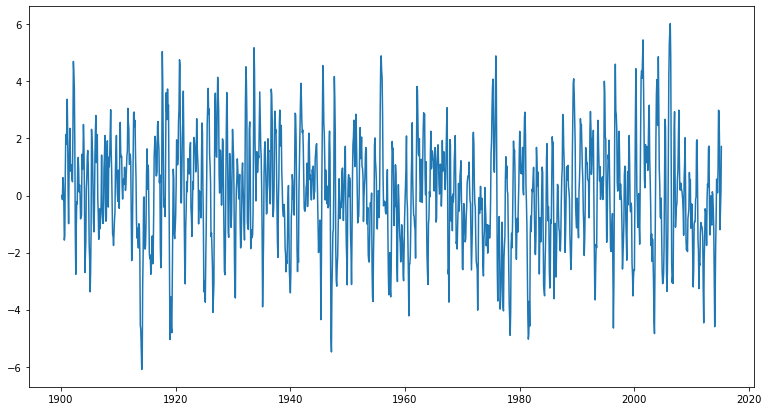

In [34]:
plt.figure(figsize=(13,7))
plt.plot(y_series)
plt.show()

**Question 3.25**

Not sure I can tell from the image above anything.
But it is an **AR(2)**

#### Estimating Different Models

Estimating an AR(1) and an AR(2) for Y series.

In [35]:
# Estimate AR(1)
y_ar1 = sm.tsa.arima.ARIMA(y_series,trend='c', order = (1,0,0))
y_ar1_fit = y_ar1.fit()
print(y_ar1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1381
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2132.177
Date:                Wed, 29 Sep 2021   AIC                           4270.355
Time:                        15:54:11   BIC                           4286.046
Sample:                    02-28-1900   HQIC                          4276.225
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0712      0.159      0.447      0.655      -0.241       0.383
ar.L1          0.8083      0.016     51.600      0.000       0.778       0.839
sigma2         1.2830      0.047     27.542      0.0

In [36]:
# Estimate AR(1)
y_ar2 = sm.tsa.arima.ARIMA(y_series,trend='c', order = (2,0,0))
y_ar2_fit = y_ar2.fit()
print(y_ar2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1381
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1938.427
Date:                Wed, 29 Sep 2021   AIC                           3884.855
Time:                        15:54:11   BIC                           3905.777
Sample:                    02-28-1900   HQIC                          3892.681
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0694      0.093      0.748      0.455      -0.113       0.251
ar.L1          1.2087      0.023     52.416      0.000       1.163       1.254
ar.L2         -0.4946      0.023    -21.598      0.0

**Questions 3.26**

In [37]:
# eviews adjust for the number of observations

print( "SBC AR 1 is {}".format(round(y_ar1_fit.bic/1381,3)))
print( "SBC AR 2 is {}".format(round(y_ar2_fit.bic/1381,3)))

SBC AR 1 is 3.104
SBC AR 2 is 2.828


**Question 3.27**

Q-test - 12th p-valye

In [38]:
sm.stats.acorr_ljungbox(res_1.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,1.979521,0.159441
2,1.996892,0.368452
3,2.005436,0.571279
4,2.026257,0.730929
5,2.462805,0.782086
6,4.831394,0.565613
7,5.174110,0.638725
8,14.344970,0.073205
9,14.808150,0.096342
10,15.132444,0.127307


In [39]:
sm.stats.acorr_ljungbox(y_ar2_fit.resid, lags=12, return_df=True)

,lb_stat,lb_pvalue
1,0.228939,0.632312
2,0.236069,0.888665
3,0.463333,0.926870
4,0.468411,0.976502
5,2.781689,0.733599
6,2.828232,0.830076
7,4.153820,0.761900
8,4.406683,0.818695
9,5.189240,0.817510
10,5.222310,0.875841


the values for this one are not correct

AR(1) = 0.000
AR(2) = 0.854

#### Auto - Arima

In [46]:
# Load auto_arima to perform 
from pmdarima.arima import auto_arima
model = auto_arima(y_series,max_q=6,max_p=6,information_criterion = 'aic')
print(model)

 ARIMA(2,0,0)(0,0,0)[0]          


In [43]:
print(model.fit(y_series).summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1381
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1938.708
Date:                Wed, 29 Sep 2021   AIC                           3883.416
Time:                        15:55:15   BIC                           3899.107
Sample:                             0   HQIC                          3889.285
                               - 1381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2089      0.023     52.453      0.000       1.164       1.254
ar.L2         -0.4944      0.023    -21.587      0.000      -0.539      -0.450
sigma2         0.9691      0.039     25.166      0.0

In [110]:
# constuct function to find best model
def autoarima(var,p,q):
    mdl =[]
    bic = []
    for i in range(0,p+1):
        for j in range(0,q+1):
            if i+j !=0 :
                model = sm.tsa.arima.ARIMA(var,trend='c', order = (i,0,j))
                model_fit = model.fit()
                mdl.append([i,j])
                # print(i,j)
                bic.append(model_fit.aic/len(var))
                # print(model_fit.bic/len(var))
    bic_min= min(bic)
    index= bic.index(bic_min)
    chosen_model = mdl[index]
    print(mdl[index])
    model= sm.tsa.arima.ARIMA(var,trend='c', order = (chosen_model[0],0,chosen_model[1])) # tem um erro aqui 
    model_fit = model.fit()
    print(model_fit.summary())

In [111]:
autoarima(y_series,4,4)

C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\

[2, 0]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1381
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1938.427
Date:                Wed, 29 Sep 2021   AIC                           3884.855
Time:                        18:17:24   BIC                           3905.777
Sample:                    02-28-1900   HQIC                          3892.681
                         - 02-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0694      0.093      0.748      0.455      -0.113       0.251
ar.L1          1.2087      0.023     52.416      0.000       1.163       1.254
ar.L2         -0.4946      0.023    -21.598  

In [88]:
bic

NameError: name 'bic' is not defined